# NearMiss

Quy trình này nhằm chọn các mẫu có đặc điểm tương đồng với lớp thiểu số, sử dụng một trong ba thủ tục sau:

1) Chọn các quan sát gần nhất với lớp thiểu số gần nhất.

2) Chọn các quan sát gần nhất với lớp thiểu số xa nhất.

3) Chọn các quan sát xa nhất so với láng giềng gần nhất của chúng.

===

Quy trình này sẽ chọn số lượng quan sát từ lớp đa số bằng số lượng quan sát từ lớp thiểu số có trong bộ dữ liệu.

===

Kích thước dữ liệu cuối cùng: 2 lần lớp thiểu số

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NearMiss

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with NearMiss

[NearMiss](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)

### Well separated classes

In [4]:
# create data

X, y = make_data(sep=2)

# set up Near Miss, first method
# that is, version = 1

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm1.fit_resample(X, y)

In [5]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data
# majority class is undersampled till it matches the minority class

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [7]:
y.value_counts()

0    983
1     17
dtype: int64

In [9]:
y_resampled.value_counts()

0    17
1    17
dtype: int64

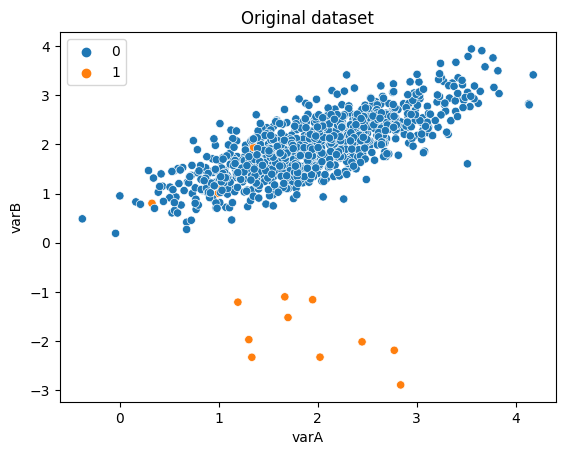

In [10]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

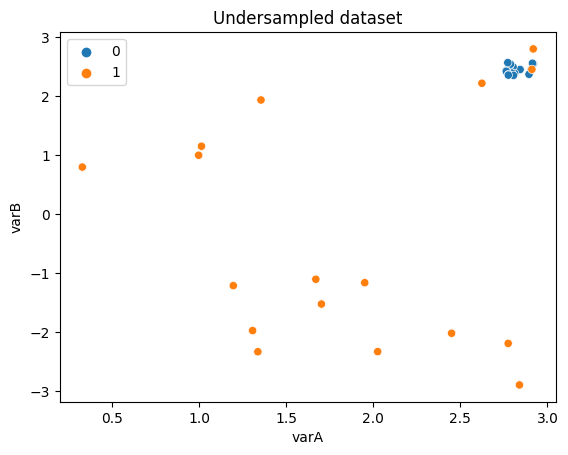

In [11]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Note how the observations closest to the minority class were retained in the dataset.

**Now let's try the second method**

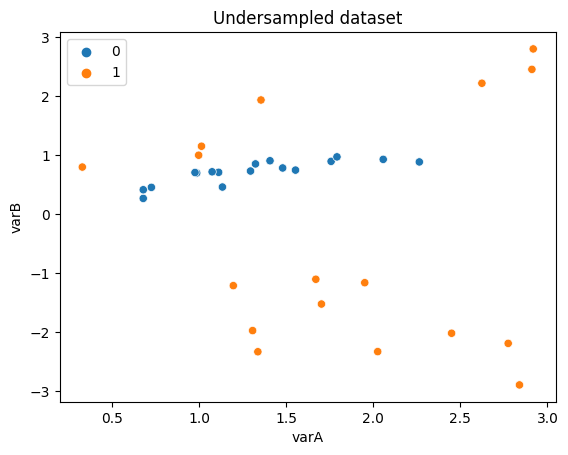

In [13]:
# version = 2

nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm2.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

The method retains those samples who are closest, to the furthest observations of the minority class.

In [14]:
# again majority class is undersampled till 
# the same number of minority observations

X_resampled.shape

(34, 2)

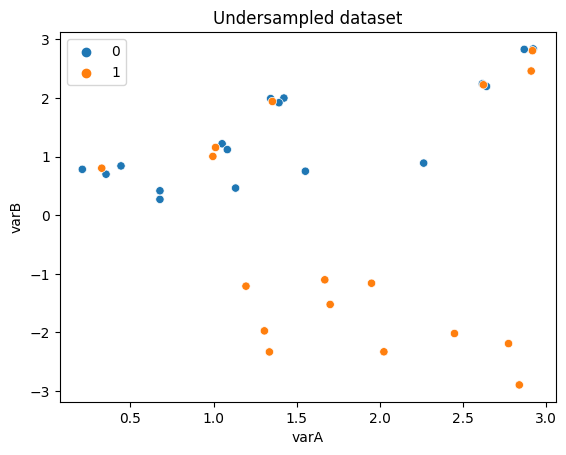

In [16]:
# version = 3

nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm3.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

Let's repeat the same exercise in data where the classes are not so clearly separated. 

In [17]:
# create data
X, y = make_data(sep=0)

# set up edited nearest neighbour transformer

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm1.fit_resample(X, y)

In [18]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [19]:
# undersampled data

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

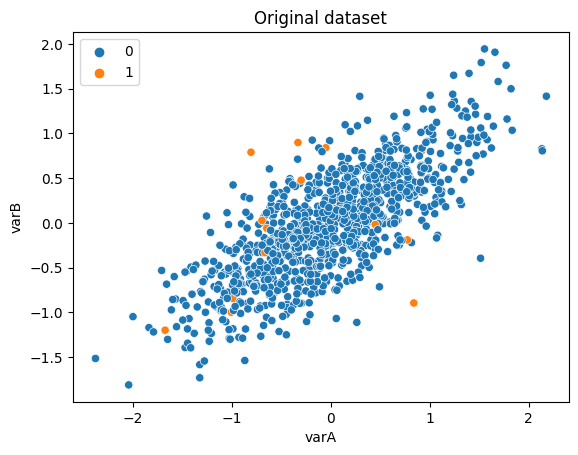

In [20]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

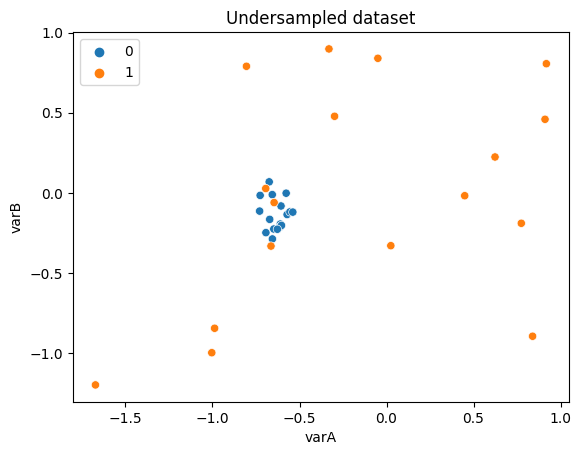

In [21]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

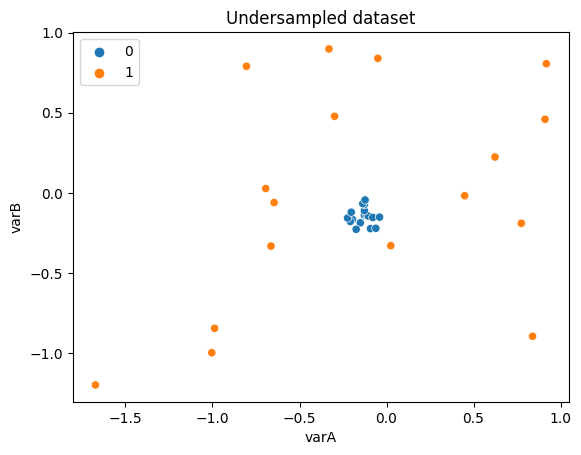

In [22]:
# version 2
nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm2.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

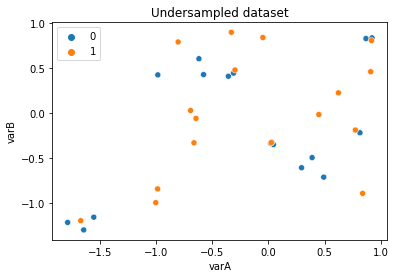

In [18]:
# version 3

nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm3.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()